## panels for fig 1 

#### Figure Purpose: Give readers enough information about the dataset as a glance to decide if it is of interest to them. 

* electrode localizations
* unit distribution across patients, stratified by region
* overall unit information
* general stimulus information

In [115]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from collections import Counter
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

from config_colors import *
from config_paths import *
from nwb_io import *

from nilearn.plotting import plot_markers

# save panels directly to the relevant svg/ subdir
panel_save_dir = Path.cwd().parent / "figure_generation" / "figure_data_overview" / "svg"

## electrode localizations

In [ ]:
data_dir = NWB_data_dir

i = 0 

for path in tqdm(list(data_dir.glob("*.nwb"))):
    print(path)
    if path.is_dir():
        continue 

    patient_id = int(path.name.split(".")[0][3:])
    print(f"  {patient_id}")
    io = NWBHDF5IO(path, mode="r")
    nwbfile = io.read()

    df_electrodes = nwbfile.electrodes.to_dataframe()
    df_electrodes.insert(0, "patient_id", [patient_id] * len(df_electrodes))
    
    if i == 0:
        df_electrodes_all = df_electrodes.copy()
    else:
        df_electrodes_all = pd.concat([df_electrodes_all, df_electrodes], ignore_index=True)
    
    io.close()
    i += 1

  0%|          | 0/29 [00:00<?, ?it/s]

/media/al/Seagate/movies_dataset_nwb/sub14.nwb
  14


  3%|▎         | 1/29 [00:00<00:14,  1.92it/s]

/media/al/Seagate/movies_dataset_nwb/sub52.nwb
  52


  7%|▋         | 2/29 [00:01<00:16,  1.61it/s]

/media/al/Seagate/movies_dataset_nwb/sub53.nwb
  53


 10%|█         | 3/29 [00:02<00:21,  1.20it/s]

/media/al/Seagate/movies_dataset_nwb/sub60.nwb
  60


 14%|█▍        | 4/29 [00:03<00:21,  1.18it/s]

/media/al/Seagate/movies_dataset_nwb/sub61.nwb
  61


 17%|█▋        | 5/29 [00:03<00:20,  1.19it/s]

/media/al/Seagate/movies_dataset_nwb/sub64.nwb
  64


 21%|██        | 6/29 [00:04<00:20,  1.14it/s]

/media/al/Seagate/movies_dataset_nwb/sub65.nwb
  65


 24%|██▍       | 7/29 [00:05<00:18,  1.17it/s]

/media/al/Seagate/movies_dataset_nwb/sub66.nwb
  66


 28%|██▊       | 8/29 [00:06<00:17,  1.21it/s]

/media/al/Seagate/movies_dataset_nwb/sub68.nwb
  68


 31%|███       | 9/29 [00:07<00:16,  1.22it/s]

/media/al/Seagate/movies_dataset_nwb/sub88.nwb
  88


 34%|███▍      | 10/29 [00:08<00:16,  1.18it/s]

/media/al/Seagate/movies_dataset_nwb/sub89.nwb
  89


 38%|███▊      | 11/29 [00:09<00:15,  1.15it/s]

/media/al/Seagate/movies_dataset_nwb/sub90.nwb
  90


 41%|████▏     | 12/29 [00:09<00:14,  1.16it/s]

/media/al/Seagate/movies_dataset_nwb/sub92.nwb
  92


 45%|████▍     | 13/29 [00:10<00:13,  1.19it/s]

/media/al/Seagate/movies_dataset_nwb/sub20.nwb
  20


 48%|████▊     | 14/29 [00:11<00:12,  1.24it/s]

/media/al/Seagate/movies_dataset_nwb/sub23.nwb
  23


 52%|█████▏    | 15/29 [00:12<00:10,  1.29it/s]

/media/al/Seagate/movies_dataset_nwb/sub28.nwb
  28


 55%|█████▌    | 16/29 [00:12<00:09,  1.33it/s]

/media/al/Seagate/movies_dataset_nwb/sub30.nwb
  30


 59%|█████▊    | 17/29 [00:13<00:08,  1.36it/s]

/media/al/Seagate/movies_dataset_nwb/sub96.nwb
  96


 62%|██████▏   | 18/29 [00:14<00:08,  1.35it/s]

/media/al/Seagate/movies_dataset_nwb/sub33.nwb
  33


 66%|██████▌   | 19/29 [00:15<00:07,  1.39it/s]

/media/al/Seagate/movies_dataset_nwb/sub39.nwb
  39


 69%|██████▉   | 20/29 [00:15<00:06,  1.38it/s]

/media/al/Seagate/movies_dataset_nwb/sub41.nwb
  41


 72%|███████▏  | 21/29 [00:16<00:05,  1.46it/s]

/media/al/Seagate/movies_dataset_nwb/sub42.nwb
  42


 76%|███████▌  | 22/29 [00:17<00:04,  1.45it/s]

/media/al/Seagate/movies_dataset_nwb/sub44.nwb
  44


 79%|███████▉  | 23/29 [00:17<00:04,  1.44it/s]

/media/al/Seagate/movies_dataset_nwb/sub98.nwb
  98


 83%|████████▎ | 24/29 [00:18<00:03,  1.40it/s]

/media/al/Seagate/movies_dataset_nwb/sub31.nwb
  31


 86%|████████▌ | 25/29 [00:19<00:02,  1.41it/s]

/media/al/Seagate/movies_dataset_nwb/sub73.nwb
  73


 90%|████████▉ | 26/29 [00:19<00:02,  1.41it/s]

/media/al/Seagate/movies_dataset_nwb/sub83.nwb
  83


 93%|█████████▎| 27/29 [00:20<00:01,  1.39it/s]

/media/al/Seagate/movies_dataset_nwb/sub87.nwb
  87


 97%|█████████▋| 28/29 [00:21<00:00,  1.37it/s]

/media/al/Seagate/movies_dataset_nwb/sub50.nwb
  50


100%|██████████| 29/29 [00:22<00:00,  1.31it/s]


In [52]:
node_coords = []
for i, row in df_electrodes_all.iterrows():
    node_coords.append(np.array([row.x, row.y, row.z]))

region_map = {
    "PIC": 0,
    "A": 1,
    "AH": 2,
    "MH": 2,
    "PH": 2, 
    "EC": 3,
    "PHC": 4,
    "APH": 4, 
    "MPH": 4, 
    "PPH": 4,
    "FF": 5,
    "LG": 6,
    "PRC": 7
}

node_values = [region_map[r]+(np.random.random()) for r in df_electrodes_all['brain_region']]


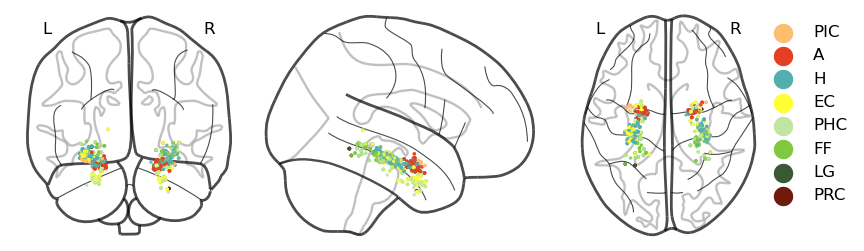

In [ ]:
from matplotlib.colors import ListedColormap

colors = [
    '#fdbf6f',
    '#E53E24', 
    '#54aead', 
    '#FFFF33', 
    '#bfe5a0', 
    '#7ECA3F',
    '#3B5738',
    '#6E1A0D',
    '#6E1A0D',  
]

#cmap=sns.color_palette("Spectral", as_cmap=True)
cmap= ListedColormap(colors, name='brain_v2')
#plt.style.use('dark_background')
fig, ax = plt.subplots(1,1, figsize=(10,3))

node_size = 2.5
alpha = 0.7

plot_markers(
    node_values,    
    node_coords,     
    node_size=node_size,
    node_cmap=cmap,
    alpha=alpha,
    figure=fig,
    axes=ax,
    colorbar=False,
    black_bg=False,
)

norm = plt.Normalize(vmin=min(node_values), vmax=max(node_values))

handles = []
for region, value in region_map.items():
    if region in ["AH"]:
        region = "H"
        value = region_map["AH"]
    elif region in ["MH", "PH"]:
        continue

    if region in ["PHC"]:
        region = "PHC"
        value = region_map["PHC"]
    elif region in ["APH", "MPH", "PPH"]:
        continue

    color = cmap(norm(value))
    handle = plt.scatter([], [], color=color, s=100, label=region, edgecolor='w')    
    handles.append(handle)

ax.legend(handles=handles, title="", markerscale=1.5, bbox_to_anchor=(1.1, 1), fontsize=12, frameon=False)

plt.savefig(panel_save_dir / "localizations.png", bbox_inches="tight", dpi=300)
plt.savefig(panel_save_dir / "localizations.svg", bbox_inches="tight", dpi=300)
plt.show()

## units across regions

In [108]:
i = 0 

for path in tqdm(list(data_dir.glob("*.nwb"))):
    print(path)
    if path.is_dir():
        continue 

    patient_id = int(path.name.split(".")[0][3:])
    print(f"  {patient_id}")
    io = NWBHDF5IO(path, mode="r")
    nwbfile = io.read()

    df_units = nwbfile.units.to_dataframe()
    df_units["unit_id"] = np.arange(0, len(df_units))

    df_units.insert(0, "patient_id", [patient_id] * len(df_units), )
    
    if i == 0:
        df_units_all = df_units.copy()
    else:
        df_units_all = pd.concat([df_units_all, df_units], ignore_index=True)
    
    io.close()
    i += 1

  0%|          | 0/29 [00:00<?, ?it/s]

/media/al/Seagate/movies_dataset_nwb/sub14.nwb
  14


  3%|▎         | 1/29 [00:09<04:15,  9.11s/it]

/media/al/Seagate/movies_dataset_nwb/sub52.nwb
  52


  7%|▋         | 2/29 [00:40<09:59, 22.22s/it]

/media/al/Seagate/movies_dataset_nwb/sub53.nwb
  53


 10%|█         | 3/29 [00:44<05:58, 13.80s/it]

/media/al/Seagate/movies_dataset_nwb/sub60.nwb
  60


 14%|█▍        | 4/29 [00:59<05:56, 14.24s/it]

/media/al/Seagate/movies_dataset_nwb/sub61.nwb
  61


 17%|█▋        | 5/29 [01:19<06:36, 16.54s/it]

/media/al/Seagate/movies_dataset_nwb/sub64.nwb
  64


 21%|██        | 6/29 [01:41<06:58, 18.21s/it]

/media/al/Seagate/movies_dataset_nwb/sub65.nwb
  65


 24%|██▍       | 7/29 [01:46<05:10, 14.13s/it]

/media/al/Seagate/movies_dataset_nwb/sub66.nwb
  66


 28%|██▊       | 8/29 [02:03<05:11, 14.85s/it]

/media/al/Seagate/movies_dataset_nwb/sub68.nwb
  68


 31%|███       | 9/29 [02:28<06:00, 18.00s/it]

/media/al/Seagate/movies_dataset_nwb/sub88.nwb
  88


 34%|███▍      | 10/29 [02:38<04:57, 15.66s/it]

/media/al/Seagate/movies_dataset_nwb/sub89.nwb
  89


 38%|███▊      | 11/29 [02:50<04:23, 14.62s/it]

/media/al/Seagate/movies_dataset_nwb/sub90.nwb
  90


 41%|████▏     | 12/29 [03:00<03:43, 13.16s/it]

/media/al/Seagate/movies_dataset_nwb/sub92.nwb
  92


 45%|████▍     | 13/29 [03:33<05:06, 19.15s/it]

/media/al/Seagate/movies_dataset_nwb/sub20.nwb
  20


 48%|████▊     | 14/29 [03:46<04:18, 17.20s/it]

/media/al/Seagate/movies_dataset_nwb/sub23.nwb
  23


 52%|█████▏    | 15/29 [03:58<03:40, 15.73s/it]

/media/al/Seagate/movies_dataset_nwb/sub28.nwb
  28


 55%|█████▌    | 16/29 [04:44<05:20, 24.66s/it]

/media/al/Seagate/movies_dataset_nwb/sub30.nwb
  30


 59%|█████▊    | 17/29 [05:04<04:40, 23.40s/it]

/media/al/Seagate/movies_dataset_nwb/sub96.nwb
  96


 62%|██████▏   | 18/29 [05:39<04:54, 26.77s/it]

/media/al/Seagate/movies_dataset_nwb/sub33.nwb
  33


 66%|██████▌   | 19/29 [06:13<04:48, 28.88s/it]

/media/al/Seagate/movies_dataset_nwb/sub39.nwb
  39


 69%|██████▉   | 20/29 [06:19<03:18, 22.04s/it]

/media/al/Seagate/movies_dataset_nwb/sub41.nwb
  41


 72%|███████▏  | 21/29 [06:26<02:20, 17.59s/it]

/media/al/Seagate/movies_dataset_nwb/sub42.nwb
  42


 76%|███████▌  | 22/29 [07:05<02:47, 24.00s/it]

/media/al/Seagate/movies_dataset_nwb/sub44.nwb
  44


 79%|███████▉  | 23/29 [07:13<01:55, 19.21s/it]

/media/al/Seagate/movies_dataset_nwb/sub98.nwb
  98


 83%|████████▎ | 24/29 [07:19<01:16, 15.23s/it]

/media/al/Seagate/movies_dataset_nwb/sub31.nwb
  31


 86%|████████▌ | 25/29 [07:47<01:16, 19.02s/it]

/media/al/Seagate/movies_dataset_nwb/sub73.nwb
  73


 90%|████████▉ | 26/29 [08:15<01:05, 21.95s/it]

/media/al/Seagate/movies_dataset_nwb/sub83.nwb
  83


 93%|█████████▎| 27/29 [08:43<00:47, 23.52s/it]

/media/al/Seagate/movies_dataset_nwb/sub87.nwb
  87


 97%|█████████▋| 28/29 [08:50<00:18, 18.56s/it]

/media/al/Seagate/movies_dataset_nwb/sub50.nwb
  50


100%|██████████| 29/29 [08:59<00:00, 18.59s/it]


In [141]:
raw_regions = df_units_all["brain_region"]

raw_regions = [r for r in raw_regions if r not in ["H", "T", "Ta", "Tb", "I"]]
units_regions = pd.Series(raw_regions).replace("AH","H").replace("MH", "H").replace("PH", "H").replace("APH","PHC").replace("MPH","PHC").replace("PPH","PHC")
data = Counter(units_regions)

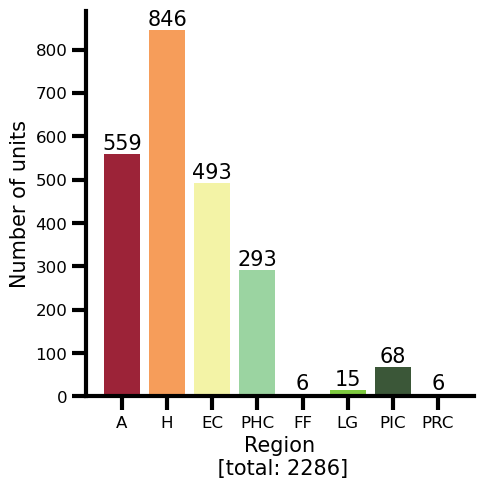

In [144]:
axwidth= 3
tickwidth = 3
ticksize = 10
ticklabelsize= 12
small_ticklabelsize = 12
labelsize= 15

rc('axes', linewidth=axwidth)
rc('xtick.major', width=tickwidth, size=ticksize)
rc('xtick', labelsize=ticklabelsize)        
rc('ytick.major', width=tickwidth, size=ticksize)
rc('ytick', labelsize=ticklabelsize)

colors = [
    "#9c2338", "#f69d5a",  "#f3f3a6", "#9bd4a1", "#486198", 
    '#7ECA3F',
    '#3B5738',
    '#6E1A0D',  
]

fig, ax = plt.subplots(1,1, figsize=(5,5))
bars = ax.bar(data.keys(), data.values(), color=colors)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Adjust vertical position
            f'{int(height)}', ha='center', va='bottom', fontsize=labelsize)

ax.set_xlabel(f"Region\n [total: {len(units_regions)}]", fontsize=labelsize)
ax.set_ylabel("Number of units", fontsize=labelsize)

sns.despine()

plt.savefig(panel_save_dir / "units_by_region.png", bbox_inches="tight", dpi=300)
plt.savefig(panel_save_dir / "units_by_region.svg", bbox_inches="tight", dpi=300)
plt.show()


## units across patient, stratified by regions